**TASK 5:SALES PREDICTION USING PYTHON** <BR>
Sales prediction means predicting how much of a product people will buy based on factors
such as the amount you spend to advertise your product, the segment of people you
advertise for, or the platform you are advertising on about your product.



Typically, a product and service-based business always need their Data Scientist to predict
their future sales with every step they take to manipulate the cost of advertising their
product. So let’s start the task of sales prediction with machine learning using Python.

In [1]:
#import's
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read data into a dataframe
data = pd.read_csv(r'Advertising.csv',index_col=0,header=0)
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
#EDA
print(data.info())
print()
print(data.dtypes)
print()
print(data.shape)
print()
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB
None

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

(200, 4)

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


We are not doing feature selection. Since all are important in business point-of-view 

In [4]:
#Finding null value
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Checking for null value

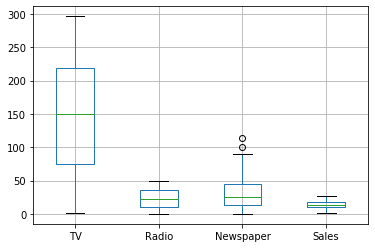

In [5]:
#checking for outliers
data.boxplot()

Looking for outliers

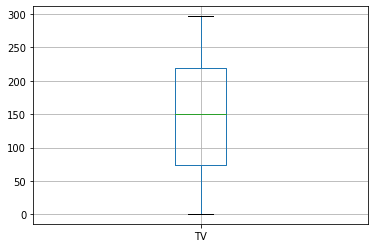

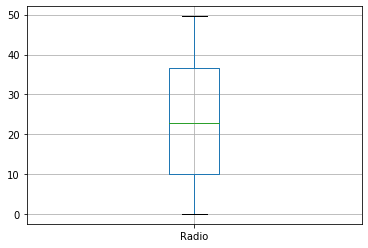

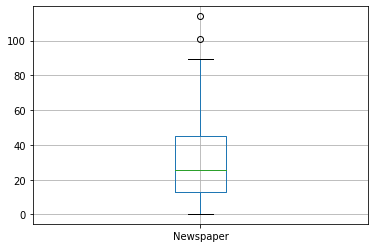

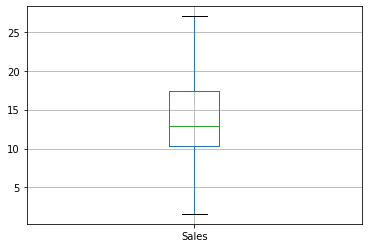

In [6]:
#Assumption 1: There should be no outliers in the data.
#Check using for loop and boxplot

for i in data.columns:
    data.boxplot(column=i)
    plt.show()

We observe that newspaper have few outliers which can be eliminated before we processed

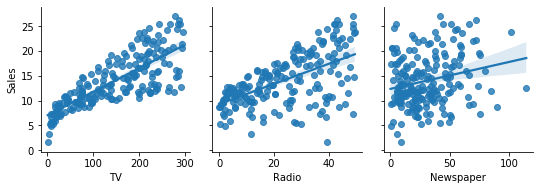

In [11]:
#Assumption 2: Assumption of linearity: Every independent variable should have a linear
# relationship with the dependent variable

sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],
             y_vars=['Sales'],kind = 'reg')
plt.show()

Looking for the relation between variables through linear regression line. Newspaper show's no relation with sales. So we can eliminate the newspaper variable and proceed with TV and radio this show a linear relation with sales variable

In [12]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [13]:
#create x and y 
X=data.iloc[:,0:-1]
Y=data.iloc[:,-1]

In [14]:
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


In [15]:
import warnings
warnings.filterwarnings("ignore")

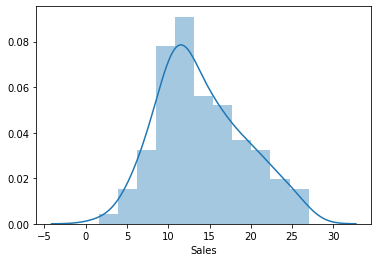

In [16]:
#Assumption of Normality: The dependent variable 
#should follow an approximate normal distribution
sns.distplot(Y)
plt.show()

This graph show approximate normal distribution. Just a little right skwness can be seen if nesscery we can use log transformation

In case y does not follow a normal distribution than we have to perporm log transformation to reduce skewness in Y and go ahead with the Y_log

#To see the above code display

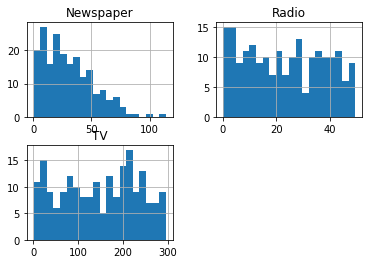

In [18]:
X.hist(bins=20)
plt.show()

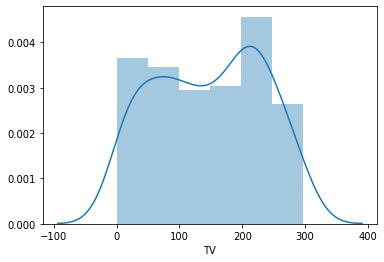

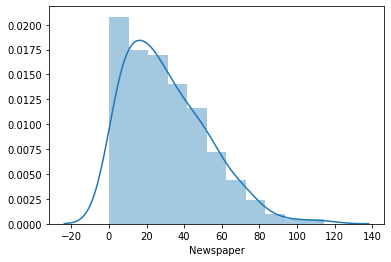

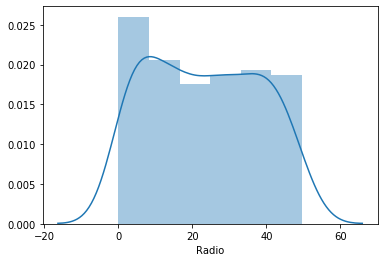

In [19]:
sns.distplot(X.TV)
plt.show()

sns.distplot(X.Newspaper)
plt.show()

sns.distplot(X.Radio)
plt.show()

In [20]:
from scipy.stats import skew
#finding the skewness in each variable
#apply is to run on multiple index
data_num_skew = X.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
 
print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])

TV          -0.069328
Radio        0.093467
Newspaper    0.887996
dtype: float64
Newspaper    0.887996
dtype: float64


We use log1p if data contain 0. because normal log 0 value is infinite. To get out of infinite we use log1p

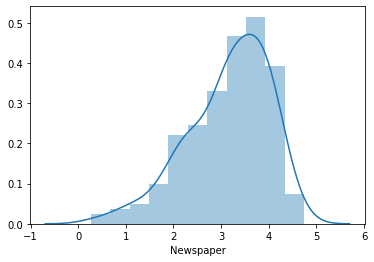

In [21]:
sns.distplot(X.Newspaper)
plt.show()

                 TV     Radio  Newspaper
TV         1.000000  0.054809   0.030951
Radio      0.054809  1.000000   0.251909
Newspaper  0.030951  0.251909   1.000000


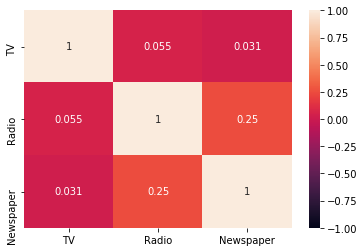

In [22]:
#Assumption of no multicollinearity: There should be no multicollinearity
#between the independent variables
#multicollinearity is the relationship amongst the multiple independent variables
corr_df=X.corr(method="pearson")
print(corr_df)
 
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,TV,3.39
1,Radio,3.63
2,Newspaper,5.44


Trying to build the model 

Before bulding the model we have to split the data into train and test, if we don't have the testing data 

In [24]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=10) 

In [25]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
#print("Percent of train data",X_train.shape[0]/X.shape[0]*100)

(160, 3)
(40, 3)
(160,)
(40,)


In [26]:
from sklearn.linear_model import LinearRegression
#create a model object
lm = LinearRegression()
#train the model object
lm.fit(X_train,Y_train)

#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

3.3532913858151527
[ 0.0437425   0.19303708 -0.04895137]


In [27]:
#pair the feature names with the coefficients
print(list(zip(X.columns, lm.coef_)))

[('TV', 0.04374250157742165), ('Radio', 0.19303707897345296), ('Newspaper', -0.04895136822248785)]


In [28]:
#Predict using the model
Y_pred = lm.predict(X_test)
print(Y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [29]:
new_df=pd.DataFrame()
new_df=X_test.copy()
 
new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=Y_pred
new_df = new_df.reset_index().drop("index",axis=1)

In [30]:
new_df

,TV,Radio,Newspaper,Actual sales,Predicted sales
0,210.7,29.5,2.332144,18.4,18.150269
1,8.7,48.9,4.330733,7.2,12.961369
2,218.4,27.7,3.996364,18.0,18.058153
3,283.6,42.0,4.207673,25.5,23.660251
4,216.4,41.7,3.703768,22.6,20.687510
5,147.3,23.9,3.000720,14.6,14.263259
6,188.4,18.1,3.280911,14.9,14.927745
7,198.9,49.4,4.110874,23.7,21.388474
8,216.8,43.9,3.339322,22.3,21.147529
9,17.2,45.9,4.252772,9.3,12.757885


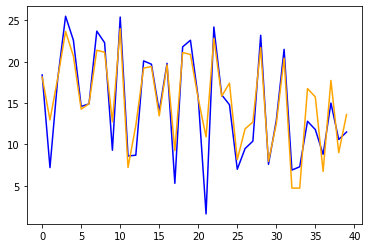

In [31]:
new_df["Actual sales"].plot(color='blue')
new_df["Predicted sales"].plot(color='orange')
plt.show()

In [32]:
lm.score(X_train, Y_train)
#Y_pred=lm.predict(X_train)
#score=r2_score(Y_train,Y_pred)

0.920898664750022

In [33]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.834801071903532
RMSE: 2.5929769110930603
Adj R-square: 0.8322725168816474


As the R-Squared value is closer to 1 so it's an good model. To prove it RMSE value is 2.5 which is between 1.6 and 25.5, the RMSE value is closer to minimum value.

In [34]:
print(Y_test.min())
print(Y_test.max())

1.6
25.5


In [35]:
new_df["Residual"]=new_df["Actual sales"]-new_df["Predicted sales"]
new_df.to_excel("Sales Prediction.xlsx",header=True,index=True)
new_df.head()

,TV,Radio,Newspaper,Actual sales,Predicted sales,Residual
0,210.7,29.5,2.332144,18.4,18.150269,0.249731
1,8.7,48.9,4.330733,7.2,12.961369,-5.761369
2,218.4,27.7,3.996364,18.0,18.058153,-0.058153
3,283.6,42.0,4.207673,25.5,23.660251,1.839749
4,216.4,41.7,3.703768,22.6,20.687510,1.912490


In [36]:
from sklearn.model_selection import train_test_split
 
#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                                    random_state=10)

In [37]:
from sklearn.linear_model import Ridge
#create a model object
rid = Ridge()
#train the model object
rid.fit(X_train,Y_train)

#print intercept and coefficients
print(rid.intercept_)
print(rid.coef_)

3.3522471725966003
[ 0.04374234  0.19302603 -0.04853131]


In [38]:
Y_pred = rid.predict(X_test)

In [39]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print(r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8348082644975934
2.592920462683998
0.832279819566434


In [40]:
from sklearn.linear_model import Lasso
#create a model object
las = Lasso()
#train the model object
las.fit(X_train,Y_train)

#print intercept and coefficients
print(las.intercept_)
print(las.coef_)

3.336794058220317
[ 0.04362374  0.18766033 -0.        ]


In [41]:
Y_pred = las.predict(X_test)

In [42]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print(r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8360506658527163
2.5831514271094234
0.8335412372688292


In [43]:
from sklearn.linear_model import ElasticNet
#create a model object
EN = ElasticNet(alpha=1, l1_ratio=0)    #Hyperparameter
#train the model object
EN.fit(X_train,Y_train)

#print intercept and coefficients
print(EN.intercept_)    #Parameter
print(EN.coef_)

3.2918541918605264
[ 0.04373331  0.19174995 -0.01973604]


In [44]:
Y_pred = EN.predict(X_test)

In [45]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print(r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8354131997716465
2.588168446200207
0.8328940140538657


Statistic Model

In [46]:
#OLS-->OLS(Y_train, X_train)
#ols-->ols(Y~X1+X2+X3)

In [47]:
#fit(X_train, Y_train)-->sklearn
#Y~X1+X2+X3,data=df-->statsmodels

In [48]:
new_df = pd.DataFrame()
new_df = X_train.copy()

new_df["Sales"]=Y_train.copy()
new_df.shape

(160, 4)

In [51]:
import statsmodels.formula.api as sm
 
# create a fitted model with all three features
lm_model = sm.ols(formula='Sales ~ TV + Radio + Newspaper', 
                  data=new_df).fit()
 
# print the coefficients
print(lm_model.params)
print(lm_model.summary())


Intercept    3.353291
TV           0.043743
Radio        0.193037
Newspaper   -0.048951
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.4
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           1.10e-85
Time:                        18:49:55   Log-Likelihood:                -276.63
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [52]:
Y_pred = lm_model.predict(X_test)

In [53]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print(r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8348010719035377
2.5929769110930154
0.832272516881653


In [54]:
import statsmodels.formula.api as sm
 
# create a fitted model with all three features
lm_model = sm.ols(formula='Sales ~ TV + Radio', 
                  data=new_df).fit()
 
# print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    3.217026
TV           0.043721
Radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Fri, 29 Dec 2023   Prob (F-statistic):           3.47e-87
Time:                        18:50:11   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [55]:
Y_pred = lm_model.predict(X_test)

In [56]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print(r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print(rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print(adjusted_r_squared)

0.8354496662944217
2.5878817077378105
0.8329310387377037


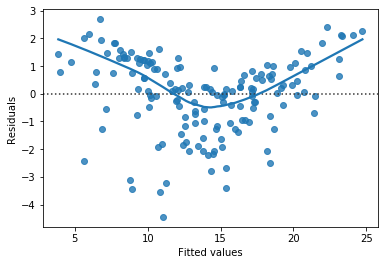

In [57]:
#Assumption: Errors should be random
#checked using Residual v/s Fitted plot
model_fitted_y = lm_model.fittedvalues
sns.residplot(x=model_fitted_y, y='Sales', data=new_df, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

We should get a ramdom line generated it should not show a repeated or wave like pattern pattern 

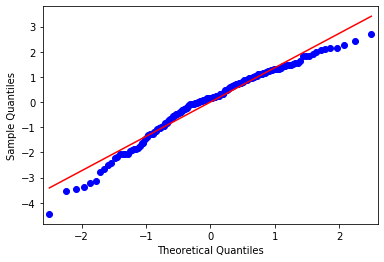

In [58]:
#Assumption: Errors should follow a approximate normal distribution
#checked using Normal QQ plot
import statsmodels.api as sma
sma.qqplot(lm_model.resid, line='s')
plt.show()

The errors should follow the red line 
The normal qq plot is used to compare our data with standard normally distributed data (Theratical Quantiles) if the errors or data point follow the red digonal line then it means it follows the normal distribution. 

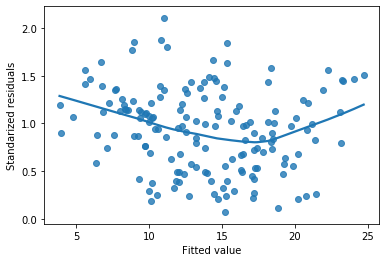

In [59]:
#Assumption: Errors should follow a constant variance-->Homoskedasticity
#checked using Scale location plot
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(lm_model.resid))
 
sns.regplot(x=lm_model.fittedvalues,
            y=model_norm_residuals_abs_sqrt,
              scatter=True, lowess=True)        
plt.ylabel("Standarized residuals")
plt.xlabel("Fitted value")
plt.show()

We should end up getting an approcimate horizontal line and not a V shaped line or a steep curve.

## Result of all the models :

In [60]:
results = pd.DataFrame({
    'Model': ['linear reg','ridge','elastic net','lasso','ols'],
    'Score': [83.48,83.48,83.54,83.60,83.54]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(10)

,Model
Score,
83.60,lasso
83.54,elastic net
83.54,ols
83.48,linear reg
83.48,ridge


# Out of all the model used in the prediction of price of house, the lasso model is giving a high accuracy of 73.32% and showing best result than the other models